In [1]:
import numpy as np
from sklearn.metrics import normalized_mutual_info_score
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from time import time


%matplotlib inline

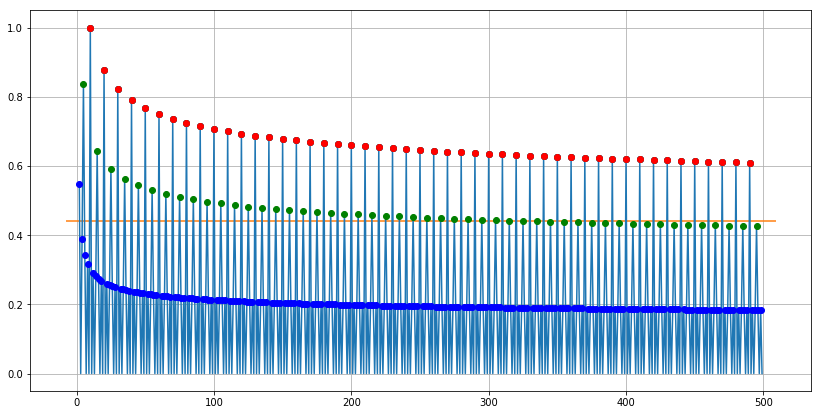

In [3]:
N = 150000
x = range(2, 500)
y = []
a = [i%10 for i in range(N)] # 10 balanced clusters
for k in x:
    b = [i%k for i in range(N)] # k cluster
    y.append(normalized_mutual_info_score(a,b))

fig = plt.figure(figsize=(14,7))
plt.plot(x,y)
plt.grid()
plt.hlines(normalized_mutual_info_score(a,range(N)),xmin=x[0]-10,xmax=x[-1]+10, colors='tab:orange')
plt.plot(x[0::2],y[0::2], 'bo') # k = multiple of 2
plt.plot(x[3::5],y[3::5], 'go') # k = multiple of 5
plt.plot(x[8::10],y[8::10], 'ro') # k = multiple of 10

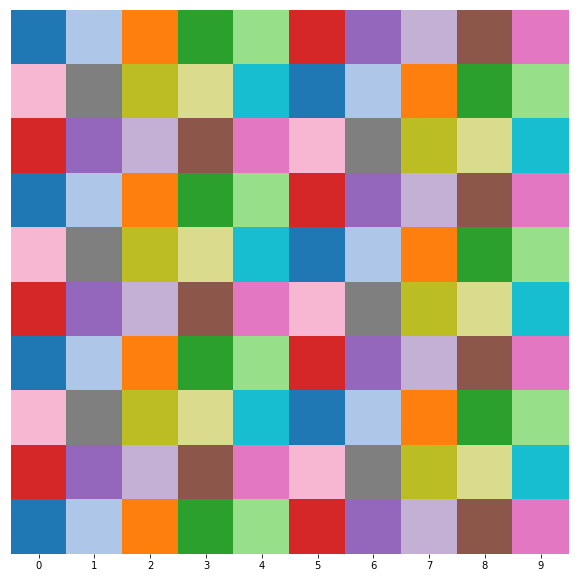

In [5]:
N = 100
k = 15
data = np.array([i%k for i in range(N)]).reshape(-1,10)
fig = plt.figure(figsize=(10,10))
sns.heatmap(data, cmap=plt.get_cmap("tab20"), vmin=0, vmax=k,cbar=False, yticklabels=False)
# plt.scatter(x,y, c=[i%15 for i in range(N)], marker=(4,0,45), cmap=plt.get_cmap("tab20"))

L: 1022
Best partition: (8, 6, 7, 3, 9)
9140 9130


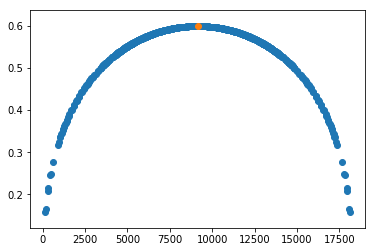

In [72]:
# What is the best 2 partition of the dataset?
from itertools import *
dataset1_count = {8: 4104, 6: 3630, 2: 3267, 1: 3265, 5: 1540, 7: 950, 4: 880, 3: 303, 0: 169, 9: 153}

def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return list(chain.from_iterable(combinations(s, r) for r in range(1,len(s))))

# a : Dataset1 labels
a = []
for category in dataset1_count.keys():
    a += [category] * dataset1_count[category] 
    N += dataset1_count[category] 
P = powerset(dataset1_count.keys())
L = len(P)
print('L:',L)
y = np.zeros(L)
x = np.zeros(L, dtype=int)

for i,s in enumerate(P):
    b = []
    for category in dataset1_count.keys():
        if category in s:
            x[i] += dataset1_count[category]
            b += [0] * dataset1_count[category]
        else:
            b += [1] * dataset1_count[category]
    y[i] = normalized_mutual_info_score(a,b)

i_max = np.argmax(y)
print('Best partition:', P[i_max])
print(x[i_max], sum(dataset1_count.values())//2)
plt.scatter(x,y)
plt.scatter(x[i_max],y[i_max])

In [8]:
dataset1_count_dict = {8: 4104, 6: 3630, 2: 3267, 1: 3265, 5: 1540, 7: 950, 4: 880, 3: 303, 0: 169, 9: 153}
N = len(dataset1_count_dict.keys())
dataset1_count = np.zeros(N, dtype=int)
for category in range(N):
    dataset1_count[category] = dataset1_count_dict[category]

k_min, k_max = 11, sum(dataset1_count) # k_min > 10!

start = time()
# a : Dataset1 labels
a = np.zeros(sum(dataset1_count), dtype=int)
start_index = np.zeros(N, dtype=int)
start_index[1:] = np.cumsum(dataset1_count[:-1], dtype=int)

for category in range(N):
    a[start_index[category]:start_index[category]+dataset1_count[category]] = category
x = np.arange(k_min, k_max) 
# y : MI of a bad scenario. 
y = np.zeros_like(x, dtype=float)
for i,k in enumerate(x):
    # b : k balanced cluster transversal to the previous categories
    y[i] = normalized_mutual_info_score(a, np.arange(len(a))%k )

# y2 : MI of a good scenario. 
y2 = np.zeros_like(x, dtype=float)
new_labels_count = np.zeros(k_max, dtype=int)
new_labels_count[:10] = dataset1_count.copy()
new_start_index = np.zeros(k_max, dtype=int)
new_start_index[:10] = start_index.copy()
b = a.copy()
for i,k in enumerate(x):
    max_cat = np.argmax(new_labels_count[:k])
    new_labels_count[k] = new_labels_count[max_cat]//2
    new_labels_count[max_cat] -= new_labels_count[k]
    new_start_index[k] = new_start_index[max_cat] + new_labels_count[max_cat]
    b[new_start_index[k]:new_start_index[k]+new_labels_count[k]] = k
    y2[i] = normalized_mutual_info_score(a, b)

stop = time()
print(stop - start)
# MI of random clusters
start = time()
N_test = 1
points = np.zeros((len(x),N_test))
for i,k in enumerate(x):
    for j in range(N_test):
        b = np.random.uniform(low=0.0, high = k-1, size=a.shape).astype(int)
        b[np.random.choice(len(b),size=k, replace=False)] = np.arange(k, dtype=int)
        points[i,j] = normalized_mutual_info_score(a, b)
stop = time()
print(stop - start)
with open('/u/MHPC17/pierocor/thesis/Silhouette_Score/data/dt1_SS.dat', 'wb') as f:
    y.tofile(f)
    y2.tofile(f)
    points.tofile(f)

271.4246370792389
179.46543431282043


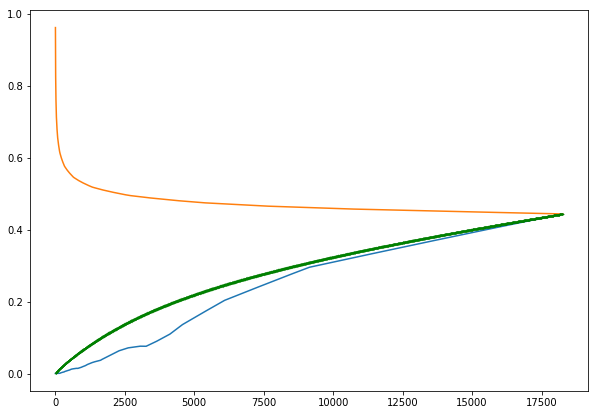

In [9]:
fig = plt.figure(figsize=(10,7))
plt.plot(x,y)
plt.plot(x,y2)
plt.plot(x,points, ls=' ', marker='.',color='g', alpha=0.3, ms=1)

To load:
```
with open('/u/MHPC17/pierocor/thesis/Silhouette_Score/data/dt1_SS.dat', 'rb') as f:
    test = np.fromfile(f)
print(test.shape)
test_l = len(test)//3
plt.plot(range(2,test_l+2),test[:test_l])
plt.plot(range(2,test_l+2),test[test_l:2*test_l])
plt.plot(range(2,test_l+2),test[2*test_l:])
```

In [16]:
dataset1_1u_count_dict = {6: 1147, 8: 710, 1: 681, 2: 622, 5: 354, 4: 214, 7: 121, 3: 83, 0: 21, 9: 6}
N = len(dataset1_1u_count_dict.keys())
dataset1_1u_count = np.zeros(N, dtype=int)
for category in range(N):
    dataset1_1u_count[int(category)] = dataset1_1u_count_dict[category]
k_min, k_max = 11, sum(dataset1_1u_count)

start = time()
# a : Dataset1 labels
a = np.zeros(sum(dataset1_1u_count), dtype=int)
start_index = np.zeros(N, dtype=int)
start_index[1:] = np.cumsum(dataset1_1u_count[:-1], dtype=int)

for category in range(N):
    a[start_index[category]:start_index[category]+dataset1_1u_count[category]] = category
x = np.arange(k_min, k_max) 
# y : MI of a bad scenario. 
y = np.zeros_like(x, dtype=float)
for i,k in enumerate(x):
    # b : k balanced cluster transversal to the previous categories
    y[i] = normalized_mutual_info_score(a, np.arange(len(a))%k )

# y2 : MI of a good scenario. 
y2 = np.zeros_like(x, dtype=float)
new_labels_count = np.zeros(k_max, dtype=int)
new_labels_count[:10] = dataset1_1u_count.copy()
new_start_index = np.zeros(k_max, dtype=int)
new_start_index[:10] = start_index.copy()
b = a.copy()
for i,k in enumerate(x):
    max_cat = np.argmax(new_labels_count[:k])
    new_labels_count[k] = new_labels_count[max_cat]//2
    new_labels_count[max_cat] -= new_labels_count[k]
    new_start_index[k] = new_start_index[max_cat] + new_labels_count[max_cat]
    b[new_start_index[k]:new_start_index[k]+new_labels_count[k]] = k
    y2[i] = normalized_mutual_info_score(a, b)

stop = time()
print(stop - start)
# MI of random clusters
start = time()
N_test = 1
points = np.zeros((len(x),N_test))
for i,k in enumerate(x):
    for j in range(N_test):
        b = np.random.uniform(low=0.0, high = k-1, size=a.shape).astype(int)
        b[np.random.choice(len(b),size=k, replace=False)] = np.arange(k, dtype=int)
        points[i,j] = normalized_mutual_info_score(a, b)
stop = time()
print(stop - start)

with open('/u/MHPC17/pierocor/thesis/Silhouette_Score/data/dt1_1u_SS.dat', 'wb') as f:
    y.tofile(f)
    y2.tofile(f)
    points.tofile(f)

19.87326717376709
12.386863470077515


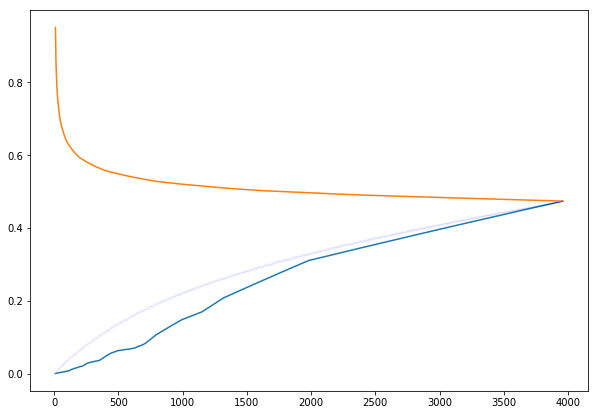

In [18]:
fig = plt.figure(figsize=(10,7))
plt.plot(x,y)
plt.plot(x,y2)
plt.plot(x,points, ls=' ', marker='.',color='b', alpha=0.01, ms=1)

In [4]:
dataset1_1u2u_count_dict = {6: 1891, 8: 1572, 1: 1403, 2: 933, 5: 713, 7: 588} #, 4: 236, 3: 147, 0: 55, 9: 19}
N = len(dataset1_1u2u_count_dict.keys())
dataset1_1u2u_count = np.zeros(N, dtype=int)
for i,category in enumerate(dataset1_1u2u_count_dict.keys()):
    dataset1_1u2u_count[i] = dataset1_1u2u_count_dict[category]

k_min, k_max = N+1, sum(dataset1_1u2u_count)

start = time()
# a : Dataset1 labels
a = np.zeros(sum(dataset1_1u2u_count), dtype=int)
start_index = np.zeros(N, dtype=int)
start_index[1:] = np.cumsum(dataset1_1u2u_count[:-1], dtype=int)

for i,category in enumerate(dataset1_1u2u_count_dict.keys()):
    a[start_index[i]:start_index[i]+dataset1_1u2u_count[i]] = category
x = np.arange(k_min, k_max) 
# y : MI of a bad scenario. 
y = np.zeros_like(x, dtype=float)
for i,k in enumerate(x):
    # b : k balanced cluster transversal to the previous categories
    y[i] = normalized_mutual_info_score(a, np.arange(len(a))%k )

# y2 : MI of a good scenario. 
y2 = np.zeros_like(x, dtype=float)
new_labels_count = np.zeros(k_max, dtype=int)
new_labels_count[:N] = dataset1_1u2u_count.copy()
new_start_index = np.zeros(k_max, dtype=int)
new_start_index[:N] = start_index.copy()
b = a.copy()
for i,k in enumerate(x):
    max_cat = np.argmax(new_labels_count[:k])
    new_labels_count[k] = new_labels_count[max_cat]//2
    new_labels_count[max_cat] -= new_labels_count[k]
    new_start_index[k] = new_start_index[max_cat] + new_labels_count[max_cat]
    b[new_start_index[k]:new_start_index[k]+new_labels_count[k]] = k
    y2[i] = normalized_mutual_info_score(a, b)

stop = time()
print(stop - start)
# MI of random clusters
start = time()
N_test = 1
points = np.zeros((len(x),N_test))
for i,k in enumerate(x):
    for j in range(N_test):
        b = np.random.uniform(low=0.0, high = k-1, size=a.shape).astype(int)
        b[np.random.choice(len(b),size=k, replace=False)] = np.arange(k, dtype=int)
        points[i,j] = normalized_mutual_info_score(a, b)
stop = time()
print(stop - start)

with open('/u/MHPC17/pierocor/thesis/Score/data/dt1_1u-2u_SS_6label.dat', 'wb') as f:
    y.tofile(f)
    y2.tofile(f)
    points.tofile(f)

51.09111213684082
32.029459953308105


FileNotFoundError: [Errno 2] No such file or directory: '/u/MHPC17/pierocor/thesis/Silhouette_Score/data/dt1_1u-2u_SS_6label.dat'

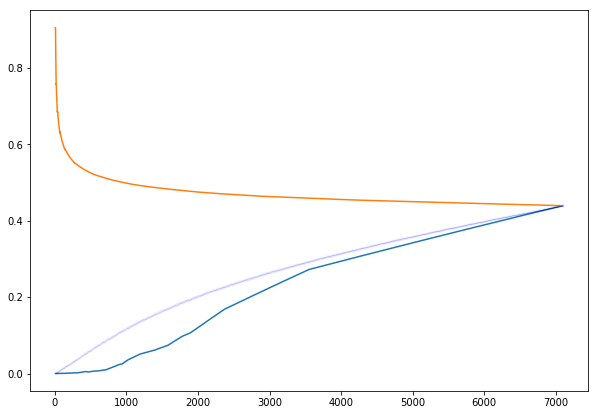

In [5]:
fig = plt.figure(figsize=(10,7))
plt.plot(x,y)
plt.plot(x,y2)
plt.plot(x,points, ls=' ', marker='.',color='b', alpha=0.01, ms=1)